## Setup

In [1]:
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plot
import pickle
from wordcloud import WordCloud as WC
from wordcloud import STOPWORDS
from collections import Counter
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [2]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gabriellahurtado/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/gabriellahurtado/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Loading Data

In [30]:
df=pd.read_csv('train.csv')

In [3]:
valid=pd.read_csv('dev.csv')

### Splitting Data into Real and Fake tables

In [31]:
fake=df[df['label']==1]
real=df[df['label']==0]

In [14]:
print('number of real reviews:',(len(real)))
print('number of fake reviews:',(len(fake)))

number of real reviews: 225055
number of fake reviews: 25819


### Exploration

#### Real vs. Fake reviews: histograms of ratings

array([<matplotlib.axes._subplots.AxesSubplot object at 0x108cad860>,
      dtype=object)

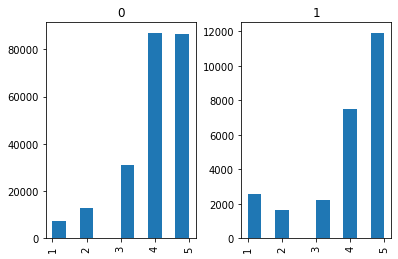

In [5]:
hist=df['rating'].hist(by=df['label'])
hist

#### Real vs. Fake reviews: proportions of unique reviewers and unique products

In [16]:
print('% of real reviews that are unique user_ids',
      len(np.unique(real['user_id']))/len(real))
print('% of fake reviews that are unique user_ids',
        len(np.unique(fake['user_id']))/len(fake))

% of real reviews that are unique user_ids 0.4668814289840261
% of fake reviews that are unique user_ids 0.8135868933730973


In [17]:
print('% of real reviews that are unique prod_ids',
        len(np.unique(real['prod_id']))/len(real))
print('% of real reviews that are unique prod_ids',
        len(np.unique(fake['prod_id']))/len(fake))

% of real reviews that are unique prod_ids 0.004101219701850659
% of real reviews that are unique prod_ids 0.03497424377396491


### Tokenizing

#### Function to get words from reviews

In [35]:
#tokenize fake and real reviews
fake['tokens'] =fake['review'].apply(lambda x: word_tokenize(x))
real['tokens'] =real['review'].apply(lambda x: word_tokenize(x))

,ex_id,user_id,prod_id,rating,label,date,review,tokens
0,0,923,0,3.0,1,2014-12-08,The food at snack is a selection of popular Gr...,"[The, food, at, snack, is, a, selection, of, p..."
1,1,924,0,3.0,1,2013-05-16,This little place in Soho is wonderful. I had ...,"[This, little, place, in, Soho, is, wonderful,..."
2,2,925,0,4.0,1,2013-07-01,ordered lunch for 15 from Snack last Friday. ...,"[ordered, lunch, for, 15, from, Snack, last, F..."
3,3,926,0,4.0,1,2011-07-28,This is a beautiful quaint little restaurant o...,"[This, is, a, beautiful, quaint, little, resta..."
4,4,927,0,4.0,1,2010-11-01,Snack is great place for a casual sit down lu...,"[Snack, is, great, place, for, a, casual, sit,..."
5,5,928,0,4.0,1,2009-09-02,A solid 4 stars for this greek food spot. If ...,"[A, solid, 4, stars, for, this, greek, food, s..."
6,7,930,0,4.0,1,2007-05-20,Love this place! Try the Chicken sandwich or ...,"[Love, this, place, !, Try, the, Chicken, sand..."
7,8,931,0,4.0,1,2005-12-27,My friend and I were intrigued by the nightly ...,"[My, friend, and, I, were, intrigued, by, the,..."
8,10,933,0,5.0,1,2014-01-21,pretty cool place...good food...good people,"[pretty, cool, place, ..., good, food, ..., go..."
9,12,935,0,5.0,1,2011-01-31,Fabulous Authentic Greek Food!!! This little s...,"[Fabulous, Authentic, Greek, Food, !, !, !, Th..."


In [4]:
valid['tokens']=valid['review'].apply(lambda x: word_tokenize(x))

In [5]:
#define function to clean tokens
def clean_tokens(tokens):
    #remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    tokens=[w.translate(table) for w in tokens]
    #make all words lowercase
    tokens = [token.lower() for token in tokens]
    #remove stopwords
    tokens=[word for word in tokens if not word in stopwords.words()]
    return tokens   

In [ ]:
valid['filtered_tokens'] = valid['tokens'].apply(lambda x:clean_tokens(x))

In [ ]:
valid.to_csv('valid_tokens.csv')

In [40]:
fake['filtered_tokens'] = fake['tokens'].apply(lambda x:clean_tokens(x))

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [42]:
fake.to_csv('fake_tokens.csv')

In [ ]:
real['tokens'] =real['review'].apply(lambda x: word_tokenize(x))
real['filtered_tokens'] = real['tokens'].apply(lambda x:clean_tokens(x))

In [64]:
#defining bag of words function
def bow(words):
    bow=[]
    for item in words:
        word_counter=Counter()
        for word in item:
            word_counter[word]+=1
        #bow.append(word_counter)
    return word_counter

In [92]:
fake_words=fake['filtered_tokens']
real_words=real['filtered_tokens']

In [48]:
real.to_csv('real_tokens.csv')

In [93]:
#counters of words and their frequencies
fake_freq_w=bow(fake_words)
real_freq_w=bow(real_words)

### Word Clouds

In [56]:
import ast
fake=pd.read_csv('fake_tokens.csv')
fake=fake.rename(columns={'Unnamed: 0':'index'})
real=pd.read_csv('real_tokens.csv')
real=real.rename(columns={'Unnamed: 0':'index'})

In [57]:
real['filtered_tokens']=real['filtered_tokens'].apply(lambda x: ast.literal_eval(x))
real['filtered_tokens']=real['filtered_tokens'].apply(lambda x: ' '.join(x).split())

fake['filtered_tokens']=fake['filtered_tokens'].apply(lambda x: ast.literal_eval(x))
fake['filtered_tokens']=fake['filtered_tokens'].apply(lambda x: ' '.join(x).split())

In [94]:
import itertools
fake_words2= list(itertools.chain(*fake['filtered_tokens']))
real_words2=list(itertools.chain(*real['filtered_tokens']))

In [68]:
def bow2(words):
    bow=[]
    word_counter=Counter()
    for item in words:
        word_counter[item]+=1
    return word_counter

In [113]:
from collections import Counter

c = list((Counter(fake_words2) & Counter(real_words2)).elements())
commons=bow2(c)
common_stop=[i[0] for i in commons.most_common(50)]

In [126]:
new_fake_words=[i for i in fake_words2 if i not in common_stop]
fake_freq_w2=bow2(new_fake_words)

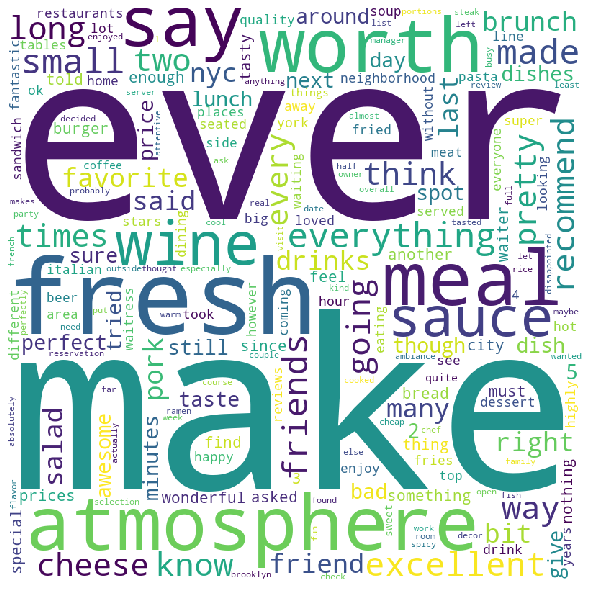

In [127]:
#fake reviews WITHOUT common words
stopword = set(common_stop) 

wcloud = WC(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopword, 
                min_font_size =5).generate_from_frequencies(fake_freq_w2) 
  
#plot the WordCloud image                        
plot.figure(figsize = (8, 8), facecolor = None) 
plot.imshow(wcloud) 
plot.axis("off") 
plot.tight_layout(pad = 0) 

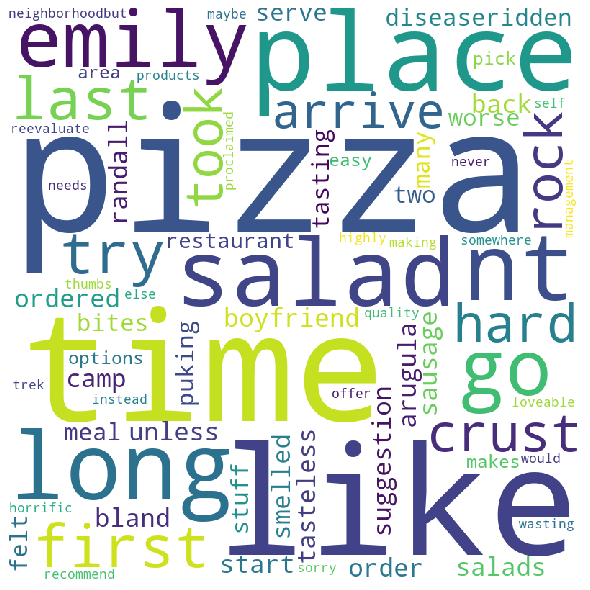

In [54]:
#fake reviews
stopwords = set(STOPWORDS) 
wcloud = WC(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size =5).generate_from_frequencies(fake_freq_w) 
  
#plot the WordCloud image                        
plot.figure(figsize = (8, 8), facecolor = None) 
plot.imshow(wcloud) 
plot.axis("off") 
plot.tight_layout(pad = 0)   

In [128]:
new_real_words=[i for i in real_words2 if i not in common_stop]
real_freq_w2=bow2(new_real_words)

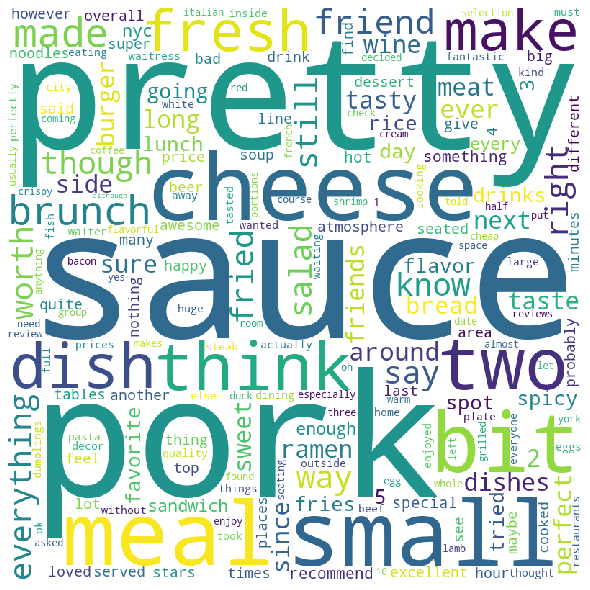

In [129]:
#real reviews WITHOUT common words
stopwords = set(common_stop) 
wcloud = WC(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size =5).generate_from_frequencies(real_freq_w2) 
  
#plot the WordCloud image                        
plot.figure(figsize = (8, 8), facecolor = None) 
plot.imshow(wcloud) 
plot.axis("off") 
plot.tight_layout(pad = 0) 

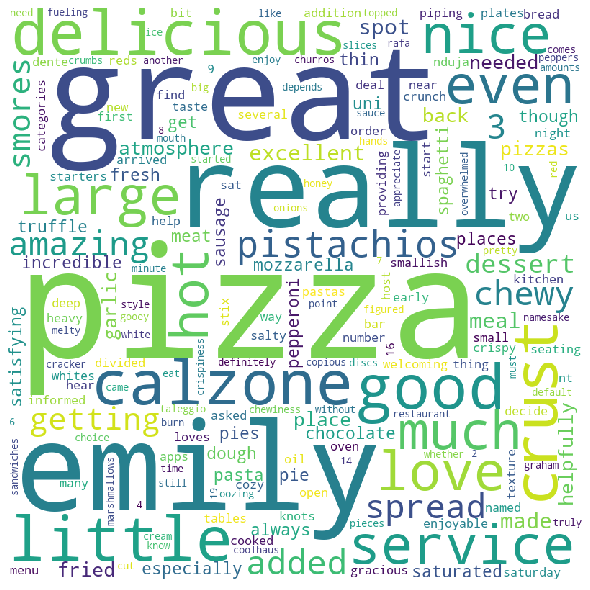

In [55]:
#real reviews
stopwords = set(STOPWORDS) 
wcloud = WC(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size =5).generate_from_frequencies(real_freq_w) 
  
# plot the WordCloud image                        
plot.figure(figsize = (8, 8), facecolor = None) 
plot.imshow(wcloud) 
plot.axis("off") 
plot.tight_layout(pad = 0)  